# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [6]:
api_key = api_keys.api_key

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

req = requests.get(base_url + f'&q={cities[0]}').json()

print(req)

name = req['name']
print(name)

{'coord': {'lon': -60.6333, 'lat': -9.1667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.34, 'feels_like': 76.91, 'temp_min': 75.34, 'temp_max': 75.34, 'pressure': 1009, 'humidity': 92, 'sea_level': 1009, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 2.13, 'deg': 109, 'gust': 2.17}, 'clouds': {'all': 96}, 'dt': 1617749582, 'sys': {'country': 'BR', 'sunrise': 1617703533, 'sunset': 1617746626}, 'timezone': -14400, 'id': 3665202, 'name': 'Aripuanã', 'cod': 200}
Aripuanã


### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# example request
#req = requests.get(base_url + f'&q={cities[0]}').json()

# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often.

city_weather = {"City": [],
                "Cloudiness" : [],
                "Country": [], 
                "Date": [], 
                "Humidity": [],
                "Lat": [],
                "Lng": [],
                "Max Temp": [],
                "Wind Speed": []
               }

for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    req = requests.get(base_url + f'&q={city}').json()
    
    if req['cod'] == 200:
        city_weather["City"].append(req['name'])
        city_weather["Cloudiness"].append(req["clouds"]["all"])
        city_weather["Country"].append(req["sys"]["country"])
        city_weather["Date"].append(req["dt"])
        city_weather["Humidity"].append(req["main"]["humidity"])
        city_weather["Lat"].append(req["coord"]["lat"])
        city_weather["Lng"].append(req["coord"]["lon"])
        city_weather["Max Temp"].append(req["main"]["temp_max"])
        city_weather["Wind Speed"].append(req["wind"]["speed"])
        
    
city_weather_df = pd.DataFrame.from_dict(city_weather)
city_weather_df.head()
    

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Aripuanã,96,BR,1617749582,92,-9.1667,-60.6333,75.34,2.13
1,Ushuaia,75,AR,1617749586,66,-54.8000,-68.3000,51.80,6.26
2,Fairbanks,1,US,1617749538,67,64.8378,-147.7164,15.01,3.44
3,Fort Nelson,90,CA,1617749768,69,58.8053,-122.7002,30.20,9.22
4,Bluff,100,NZ,1617749769,82,-46.6000,168.3333,57.99,8.99


### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [17]:
city_weather_df.to_csv('cityweather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

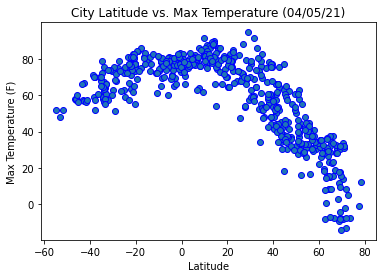

<Figure size 432x288 with 0 Axes>

In [24]:
fig, ax = plt.subplots()

ax.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], edgecolors="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (04/05/21)")

plt.show()
plt.savefig('max_temp.png')

#### Latitude vs. Humidity Plot

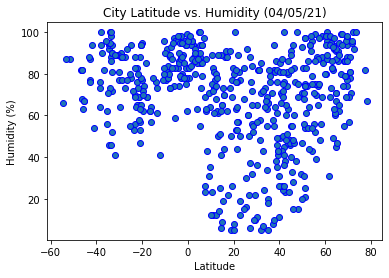

<Figure size 432x288 with 0 Axes>

In [25]:
fig,ax = plt.subplots()

ax.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], edgecolors="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (04/05/21)")

plt.show()
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

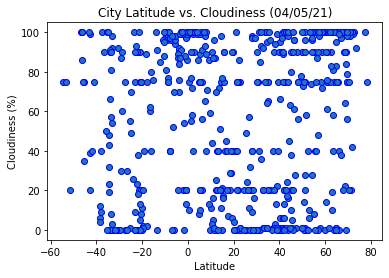

<Figure size 432x288 with 0 Axes>

In [26]:
fig,ax = plt.subplots()

ax.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"],edgecolors="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (04/05/21)")

plt.show()
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

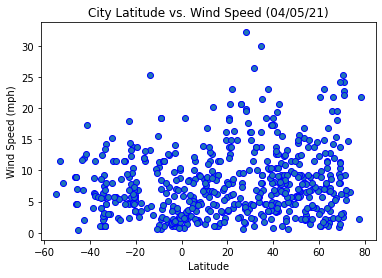

<Figure size 432x288 with 0 Axes>

In [27]:
fig,ax = plt.subplots()

ax.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], edgecolors="b")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (04/05/21)")

plt.show()
plt.savefig('wind_speed.png')

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

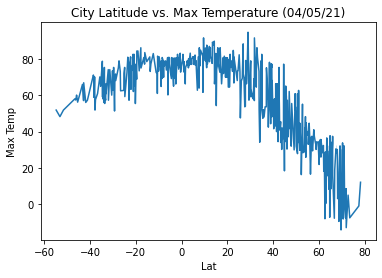

<Figure size 432x288 with 0 Axes>

In [28]:
import seaborn as sns

sns.lineplot(x="Lat",y="Max Temp", data=city_weather_df).set_title("City Latitude vs. Max Temperature (04/05/21)")
plt.show()
plt.savefig('max_temp_sns.png')

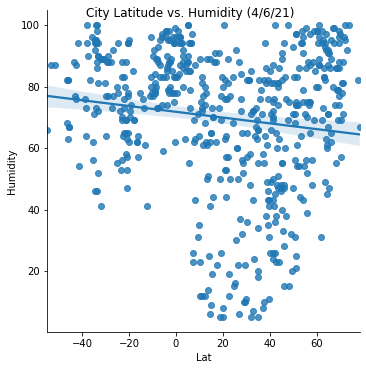

<Figure size 432x288 with 0 Axes>

In [29]:
sns.lmplot(x="Lat", y="Humidity", data=city_weather_df).fig.suptitle("City Latitude vs. Humidity (4/6/21)")
plt.show()
plt.savefig('Humidity_sns.png')

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
#1. Max temperatures increase as you get closer to the equator; decrease as you get farther away.
#2. Humidity decreases the closest to the equator. Humidity is the lowest between 0 and 45 latitude
#3. Cloudiness is indifferent to latitude.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 